In [3]:

import pandas as pd
import numpy as np
import os
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
#  Load Dataset from local path
base_path = r"C:\Users\Sani_\Downloads\New folder\cloud\sentiment labelled sentences"

file_names = [
    "amazon_cells_labelled.txt",
    "imdb_labelled.txt",
    "yelp_labelled.txt"
]

dataframes = []
for file in file_names:
    file_path = os.path.join(base_path, file)
    df = pd.read_csv(file_path, sep='\t', header=None, names=['sentence', 'label'])
    dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)

print("Dataset shape:", df.shape)
df.sample(5)


Dataset shape: (2748, 2)


,sentence,label
212,Great price also!,1
2412,Eclectic selection.,1
981,you could only take 2 videos at a time and the...,0
864,"But, in any case, the best part is, you can do...",1
803,"If there is a wind, it is completely useless.",0


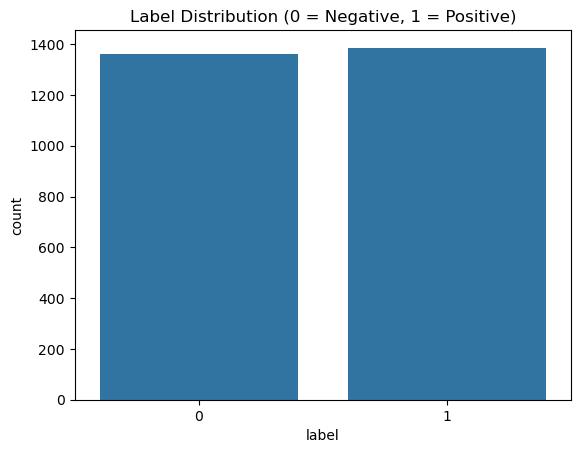

In [7]:
#  Label Distribution
sns.countplot(data=df, x='label')
plt.title("Label Distribution (0 = Negative, 1 = Positive)")
plt.show()


In [9]:
# Preprocess Text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = text.lower()  # lowercase
    return text

df['cleaned'] = df['sentence'].apply(clean_text)
df[['sentence', 'cleaned']].head()


,sentence,cleaned
0,So there is no way for me to plug it in here i...,so there is no way for me to plug it in here i...
1,"Good case, Excellent value.",good case excellent value
2,Great for the jawbone.,great for the jawbone
3,Tied to charger for conversations lasting more...,tied to charger for conversations lasting more...
4,The mic is great.,the mic is great


In [11]:
#  Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned'], df['label'], test_size=0.2, random_state=42
)


In [13]:
#  Vectorization
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("Vocabulary size:", len(vectorizer.vocabulary_))


Vocabulary size: 4741


In [15]:
#  Train Model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8127272727272727

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       291
           1       0.79      0.82      0.80       259

    accuracy                           0.81       550
   macro avg       0.81      0.81      0.81       550
weighted avg       0.81      0.81      0.81       550



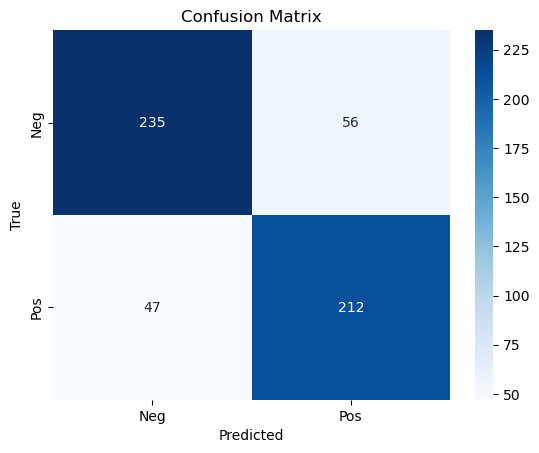

In [17]:
#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Neg", "Pos"], yticklabels=["Neg", "Pos"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [19]:
#  Predict Custom Sentences
def predict_sentiment(sentence):
    cleaned = clean_text(sentence)
    vector = vectorizer.transform([cleaned])
    pred = model.predict(vector)[0]
    return "Positive 😊" if pred == 1 else "Negative 😠"

# Test predictions
print(predict_sentiment("I love this product, it's amazing!"))
print(predict_sentiment("This is the worst thing I've ever bought."))


Positive 😊
Negative 😠
